# Assingment 3
#submmited by Kush Kumar


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as se


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("/content/dataset_model.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape


(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Problem-1** Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe

In [5]:
for i in df:
   if df[i].is_unique:
     df=df.drop(i,axis=1) 
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Problem-2** 
Identifying Continous & Categorical Columns

# Continous

In [6]:

num_cols = df._get_numeric_data().columns
num_cols

for i in num_cols:
  print(str(i)+'\t'+str(len(df[i].unique())))

ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204
Loan_Amount_Term	11
Credit_History	3


#Categorical Columns

In [7]:
for j in list(set(df.columns) - set(num_cols)):
  print(str(j)+'\t'+str(len(df[j].unique())))

Self_Employed	3
Gender	3
Loan_Status	2
Dependents	5
Property_Area	3
Education	2
Married	3


**Problem-3** 
Performing Uni-variate Analysis with Plots.Record your Observations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b496337f0>,
      dtype=object)

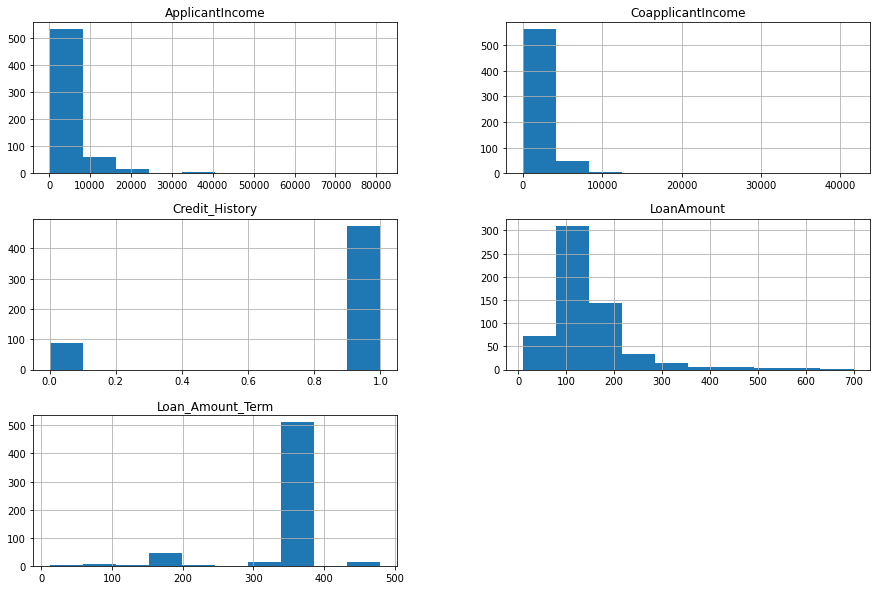

In [8]:
df.hist(figsize=[15,10])

Text(0.5, 0, 'Gender')

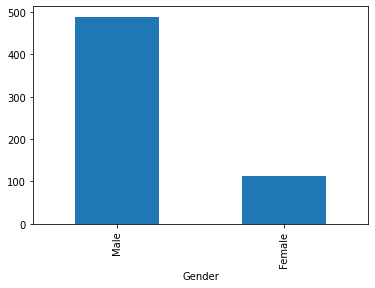

In [9]:
df['Gender'].value_counts().plot.bar().set_xlabel('Gender')

Text(0.5, 0, 'Marital Status')

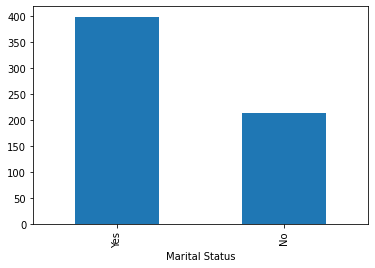

In [10]:
df['Married'].value_counts().plot.bar().set_xlabel('Marital Status')

Text(0.5, 0, 'Number of People Dependent On Applicant')

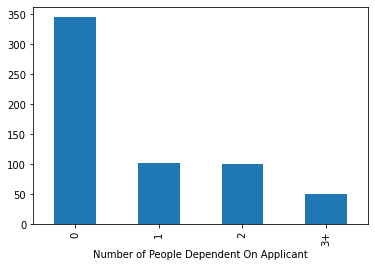

In [11]:
df['Dependents'].value_counts().plot.bar().set_xlabel('Number of People Dependent On Applicant')

Text(0.5, 0, 'Graudate/Non_Graduate')

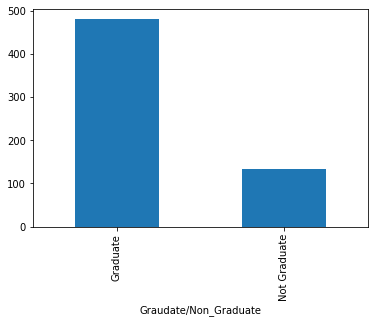

In [12]:
df['Education'].value_counts().plot.bar().set_xlabel('Graudate/Non_Graduate')

Text(0.5, 0, 'Employment Type')

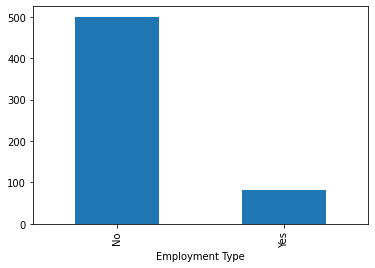

In [13]:
df['Self_Employed'].value_counts().plot.bar().set_xlabel('Employment Type')

Text(0.5, 0, 'Kind Of Land owned by Applicant')

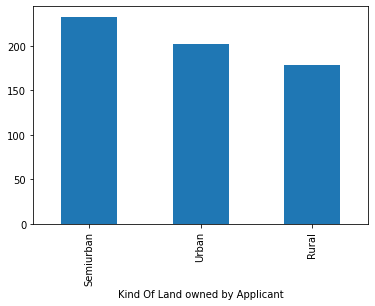

In [14]:
df['Property_Area'].value_counts().plot.bar().set_xlabel('Kind Of Land owned by Applicant')


**Problem-4**
Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

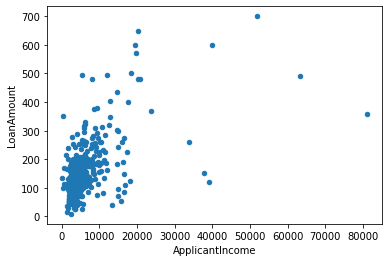

In [15]:
df.plot.scatter(x='ApplicantIncome', y='LoanAmount')

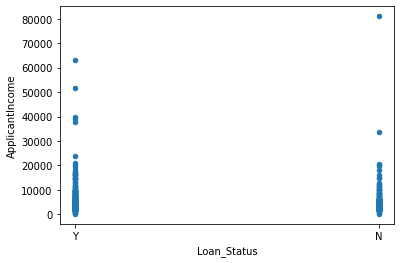

In [16]:
df.plot.scatter(x= 'Loan_Status',y= 'ApplicantIncome')

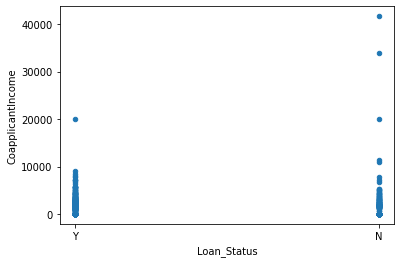

In [17]:
df.plot.scatter(x= 'Loan_Status',y= 'CoapplicantIncome')

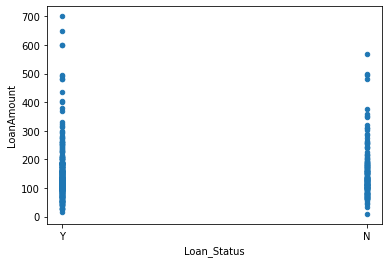

In [18]:

df.plot.scatter(x= 'Loan_Status',y= 'LoanAmount')

**Problem-5**
How is the class distribution (Y/N) in Label(Target) Variable ?


In [19]:
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


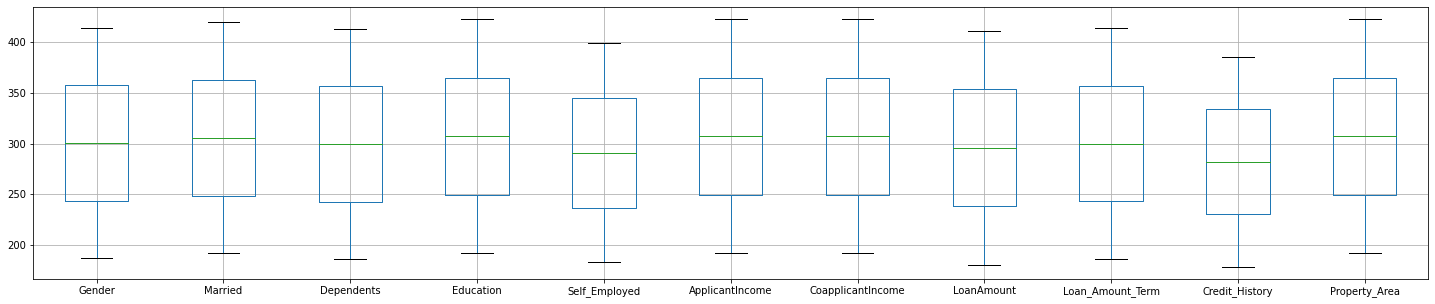

In [20]:

df.groupby('Loan_Status').count().boxplot(figsize=[25,5],fontsize=10)

# df.groupby('Loan_Status').count().subplots(figsize=[25,5],fontsize=10)

**Problem-7**
Identify the Independent Variables that have missing values.

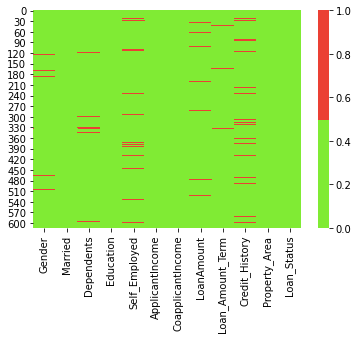

In [21]:
cols = df.columns 
colours = ['#80eb34', '#eb4034']
se.heatmap(df[cols].isnull(), cmap=se.color_palette(colours))

In [22]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 4.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%


**Problem-8**
Handle missing values appropriately , explain the technique applied for each case

created missing indicator for: Gender
created missing indicator for: Married
created missing indicator for: Dependents
created missing indicator for: Self_Employed
created missing indicator for: LoanAmount
created missing indicator for: Loan_Amount_Term
created missing indicator for: Credit_History


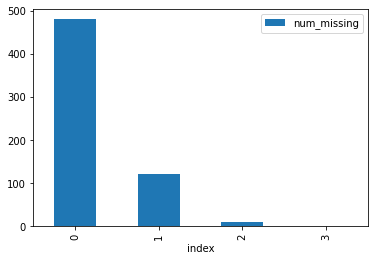

In [23]:
#Missing data Histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [24]:

#Drop the observation
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
print(df.shape)
print(df_less_missing_rows.shape)

(614, 20)
(614, 20)


In [25]:
#Impute the observation
# replace missing values with the median.
print("values before imputing")
for v in df['LoanAmount']:
    print(v)
med = df['LoanAmount'].median()
print("Median")
print(med)
df['LoanAmount'] = df['LoanAmount'].fillna(med)
print("values after imputing")
for k in df['LoanAmount']:
    k

values before imputing
nan
128.0
66.0
120.0
141.0
267.0
95.0
158.0
168.0
349.0
70.0
109.0
200.0
114.0
17.0
125.0
100.0
76.0
133.0
115.0
104.0
315.0
116.0
112.0
151.0
191.0
122.0
110.0
35.0
120.0
201.0
74.0
106.0
114.0
320.0
nan
100.0
144.0
184.0
110.0
80.0
47.0
75.0
134.0
96.0
88.0
44.0
144.0
120.0
144.0
100.0
120.0
112.0
134.0
286.0
97.0
96.0
135.0
180.0
144.0
120.0
99.0
165.0
nan
116.0
258.0
126.0
312.0
125.0
136.0
172.0
97.0
81.0
95.0
187.0
113.0
176.0
110.0
180.0
130.0
111.0
nan
167.0
265.0
50.0
136.0
99.0
104.0
210.0
175.0
131.0
188.0
81.0
122.0
25.0
nan
137.0
50.0
115.0
131.0
133.0
151.0
nan
nan
160.0
100.0
225.0
120.0
216.0
94.0
136.0
139.0
152.0
nan
118.0
185.0
154.0
85.0
175.0
259.0
180.0
44.0
137.0
81.0
194.0
93.0
370.0
nan
160.0
182.0
650.0
74.0
70.0
25.0
102.0
290.0
84.0
88.0
242.0
129.0
185.0
168.0
175.0
122.0
187.0
100.0
70.0
30.0
225.0
125.0
118.0
152.0
244.0
113.0
50.0
600.0
160.0
187.0
120.0
255.0
98.0
275.0
121.0
158.0
75.0
182.0
112.0
129.0
63.0
200.0
95.0
700.0
81.0

**Problem-9**
Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [26]:
print("0 to 25% \n",df.quantile(0)) #Q0
print("25% to 50%\n",df.quantile(0.25)) #Q1
print("50% to 75%\n",df.quantile(0.50)) #Q2
print("75% t0 100%\n",df.quantile(0.75))

0 to 25% 
 ApplicantIncome               150.0
CoapplicantIncome               0.0
LoanAmount                      9.0
Loan_Amount_Term               12.0
Credit_History                  0.0
Gender_ismissing                0.0
Married_ismissing               0.0
Dependents_ismissing            0.0
Self_Employed_ismissing         0.0
LoanAmount_ismissing            0.0
Loan_Amount_Term_ismissing      0.0
Credit_History_ismissing        0.0
num_missing                     0.0
Name: 0, dtype: float64
25% to 50%
 ApplicantIncome               2877.50
CoapplicantIncome                0.00
LoanAmount                     100.25
Loan_Amount_Term               360.00
Credit_History                   1.00
Gender_ismissing                 0.00
Married_ismissing                0.00
Dependents_ismissing             0.00
Self_Employed_ismissing          0.00
LoanAmount_ismissing             0.00
Loan_Amount_Term_ismissing       0.00
Credit_History_ismissing         0.00
num_missing                  

**Problem-10**
Use Box-Plot chart to represent the Outliers for each Independent Variable

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

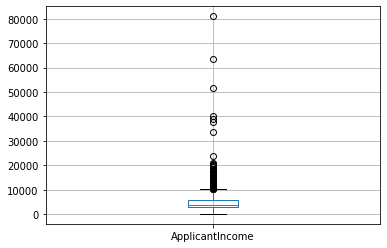

In [27]:
df.boxplot(column=['ApplicantIncome'])
df["ApplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

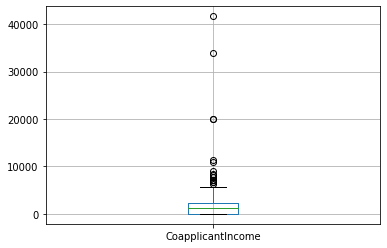

In [28]:
df.boxplot(column=['CoapplicantIncome'])
df["CoapplicantIncome"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

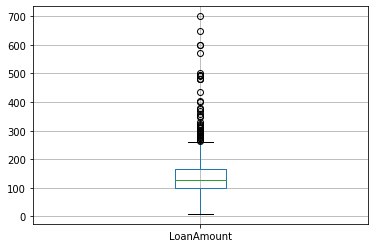

In [29]:
df.boxplot(column=['LoanAmount'])
df["LoanAmount"].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

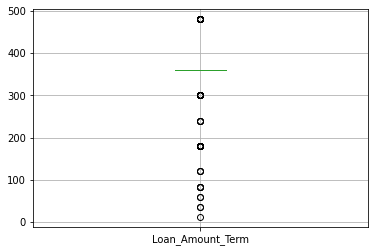

In [30]:
df.boxplot(column=['Loan_Amount_Term'])
df["Loan_Amount_Term"].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

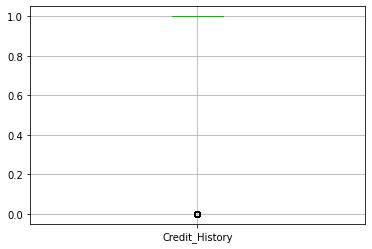

In [31]:
df.boxplot(column=['Credit_History'])
df["Credit_History"].describe()

**Problem-11**
Perform treatment of these Outliers using appropriate techniqies.Explain your approach

In [32]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,num_missing
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.00000,0.842199,0.242671
std,6109.041673,2926.248369,84.107233,65.12041,0.364878,0.489435
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,0.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      601 non-null    object 
 1   Married                     611 non-null    object 
 2   Dependents                  599 non-null    object 
 3   Education                   614 non-null    object 
 4   Self_Employed               582 non-null    object 
 5   ApplicantIncome             614 non-null    int64  
 6   CoapplicantIncome           614 non-null    float64
 7   LoanAmount                  614 non-null    float64
 8   Loan_Amount_Term            600 non-null    float64
 9   Credit_History              564 non-null    float64
 10  Property_Area               614 non-null    object 
 11  Loan_Status                 614 non-null    object 
 12  Gender_ismissing            614 non-null    bool   
 13  Married_ismissing           614 non

In [34]:
Q1 = df.quantile(0.1)
Q3 = df.quantile(0.9)
IQR = Q3 - Q1
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)).sum())


     ApplicantIncome  CoapplicantIncome  ...  Self_Employed_ismissing  num_missing
0               True               True  ...                     True         True
1               True               True  ...                     True         True
2               True               True  ...                     True         True
3               True               True  ...                     True         True
4               True               True  ...                     True         True
..               ...                ...  ...                      ...          ...
609             True               True  ...                     True         True
610             True               True  ...                     True         True
611             True               True  ...                     True         True
612             True               True  ...                     True         True
613             True               True  ...                     True         True

[61

**Step 1**

* Perform Label Encoding on Target Variable (Loan_Status)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df.copy()
df_cat['Loan_Status'] = le.fit_transform(df_cat['Loan_Status'])
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_ismissing,Married_ismissing,Dependents_ismissing,Self_Employed_ismissing,LoanAmount_ismissing,Loan_Amount_Term_ismissing,Credit_History_ismissing,num_missing
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,False,False,True,False,False,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,False,False,False,False,False,False,False,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,False,False,False,False,False,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,False,False,False,False,False,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,False,False,False,False,False,0


In [36]:
corr = df_cat.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_ismissing,Married_ismissing,Dependents_ismissing,Self_Employed_ismissing,LoanAmount_ismissing,Loan_Amount_Term_ismissing,Credit_History_ismissing,num_missing
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045306,-0.014715,-0.004710,0.118787,0.009224,-0.005596,0.017661,-0.000718,-0.031836,-0.034651,0.013174
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059878,-0.002056,-0.059187,-0.007825,-0.032830,-0.029503,0.075084,-0.037945,0.005756,0.104297,0.063492
LoanAmount,0.565181,0.189218,1.000000,0.039358,-0.007543,-0.033214,0.109880,0.002430,-0.032800,0.019960,-0.040722,-0.053690,0.051967,0.028607
Loan_Amount_Term,-0.045306,-0.059878,0.039358,1.000000,0.001470,-0.021268,-0.001056,0.019611,0.032579,-0.018747,-0.011449,NaN,-0.007785,-0.004887
Credit_History,-0.014715,-0.002056,-0.007543,0.001470,1.000000,0.561678,-0.037289,0.031654,-0.079589,0.071965,-0.017626,-0.118501,NaN,-0.055780


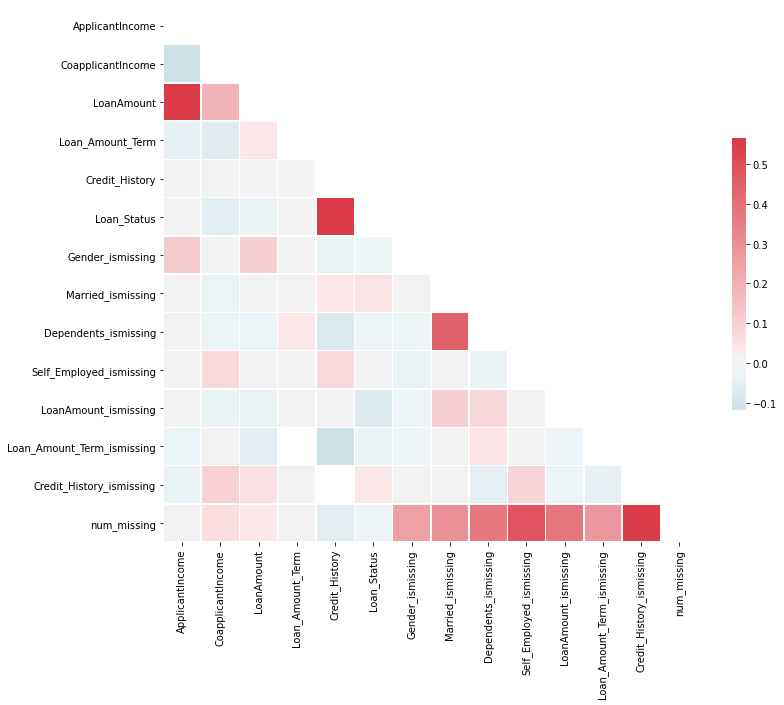

In [37]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = se.diverging_palette(225,10, as_cmap=True)
svm = se.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

Perform One Hot Encoding on Categorical Independent Variables.


In [38]:
df_oh =df.copy()
num_cols = df._get_numeric_data().columns
for i in list(set(df.columns) - set(num_cols)): 
  df_oh = pd.get_dummies(df_oh, columns=[i], prefix=[i] )
df_oh

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_ismissing,Married_ismissing,Dependents_ismissing,Self_Employed_ismissing,LoanAmount_ismissing,Loan_Amount_Term_ismissing,Credit_History_ismissing,num_missing,Self_Employed_No,Self_Employed_Yes,Gender_Female,Gender_Male,Loan_Status_N,Loan_Status_Y,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Married_No,Married_Yes
0,5849,0.0,128.0,360.0,1.0,False,False,False,False,True,False,False,1,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,False,False,False,False,False,False,False,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
2,3000,0.0,66.0,360.0,1.0,False,False,False,False,False,False,False,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,False,False,False,False,False,False,False,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,False,False,False,False,False,False,False,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0
610,4106,0.0,40.0,180.0,1.0,False,False,False,False,False,False,False,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1
611,8072,240.0,253.0,360.0,1.0,False,False,False,False,False,False,False,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1
612,7583,0.0,187.0,360.0,1.0,False,False,False,False,False,False,False,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1


In [39]:
df_oh.shape

(614, 30)

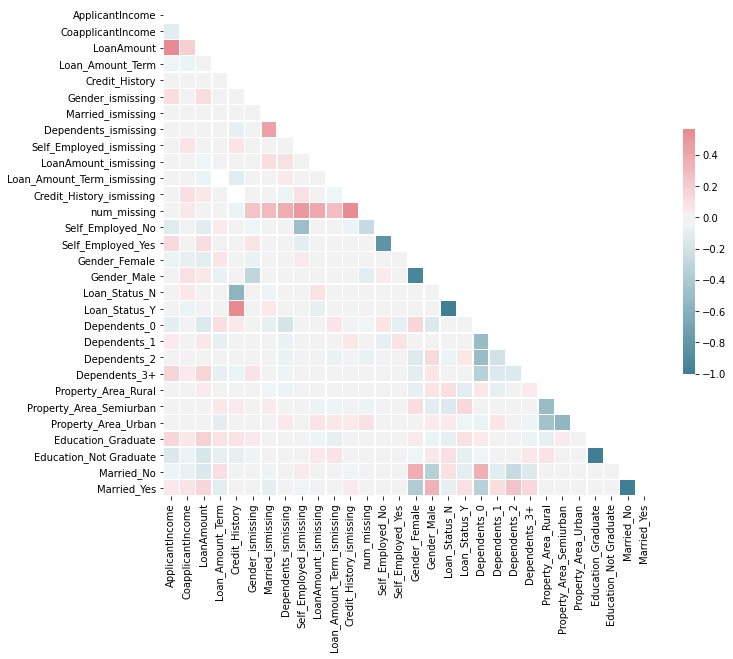

In [40]:
#Carry out Correlation analysis on this dataframe. Plot using HeatMap
corel = df_oh.corr()
mask = np.zeros_like(corel, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = se.diverging_palette(220, 10, as_cmap=True)
svm = se.heatmap(corel, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()